In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [6]:
na_vals= ["NA","Missing","nan","NaN"]
life = pd.read_csv("C:/Users/candy/OneDrive/Desktop/PY4E/Life-Expectancy-Data-Updated.csv", na_values=na_vals)
life

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


In [4]:
life.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


DATA EXPLORATION

In [ ]:
life.iloc[:,3:22]

In [5]:
print(life.isna().sum())
life.dropna(inplace=True)
# life.dropna(axis="index",inplace=True)
# life.fillna(0,inplace=True)
print(life.isna().sum())
# life.replace([np.inf, -np.inf], np.nan, inplace=True)



Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64
Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                       

In [7]:
country_group = life.groupby("Country")
country_group.get_group("Afghanistan").head(5)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
68,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.020,62,12,21.7,...,24,0.02,148,20.78,2.3,2.5,2.2,0,1,55.8
175,Afghanistan,Asia,2014,55.2,73.6,231.9780,0.010,62,44,23.2,...,62,0.03,565,33.37,17.5,17.5,3.5,0,1,63.0
351,Afghanistan,Asia,2013,57.3,76.9,236.2210,0.010,64,38,23.0,...,64,0.03,569,32.27,17.7,17.7,3.5,0,1,62.5
462,Afghanistan,Asia,2008,69.2,95.7,259.8060,0.028,64,23,22.5,...,64,0.02,399,27.72,18.8,18.9,3.0,0,1,59.9
614,Afghanistan,Asia,2006,74.6,104.1,271.4905,0.026,64,18,22.3,...,58,0.02,354,26.43,19.2,19.3,2.7,0,1,58.8


In [9]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

<Figure size 1000x1200 with 0 Axes>

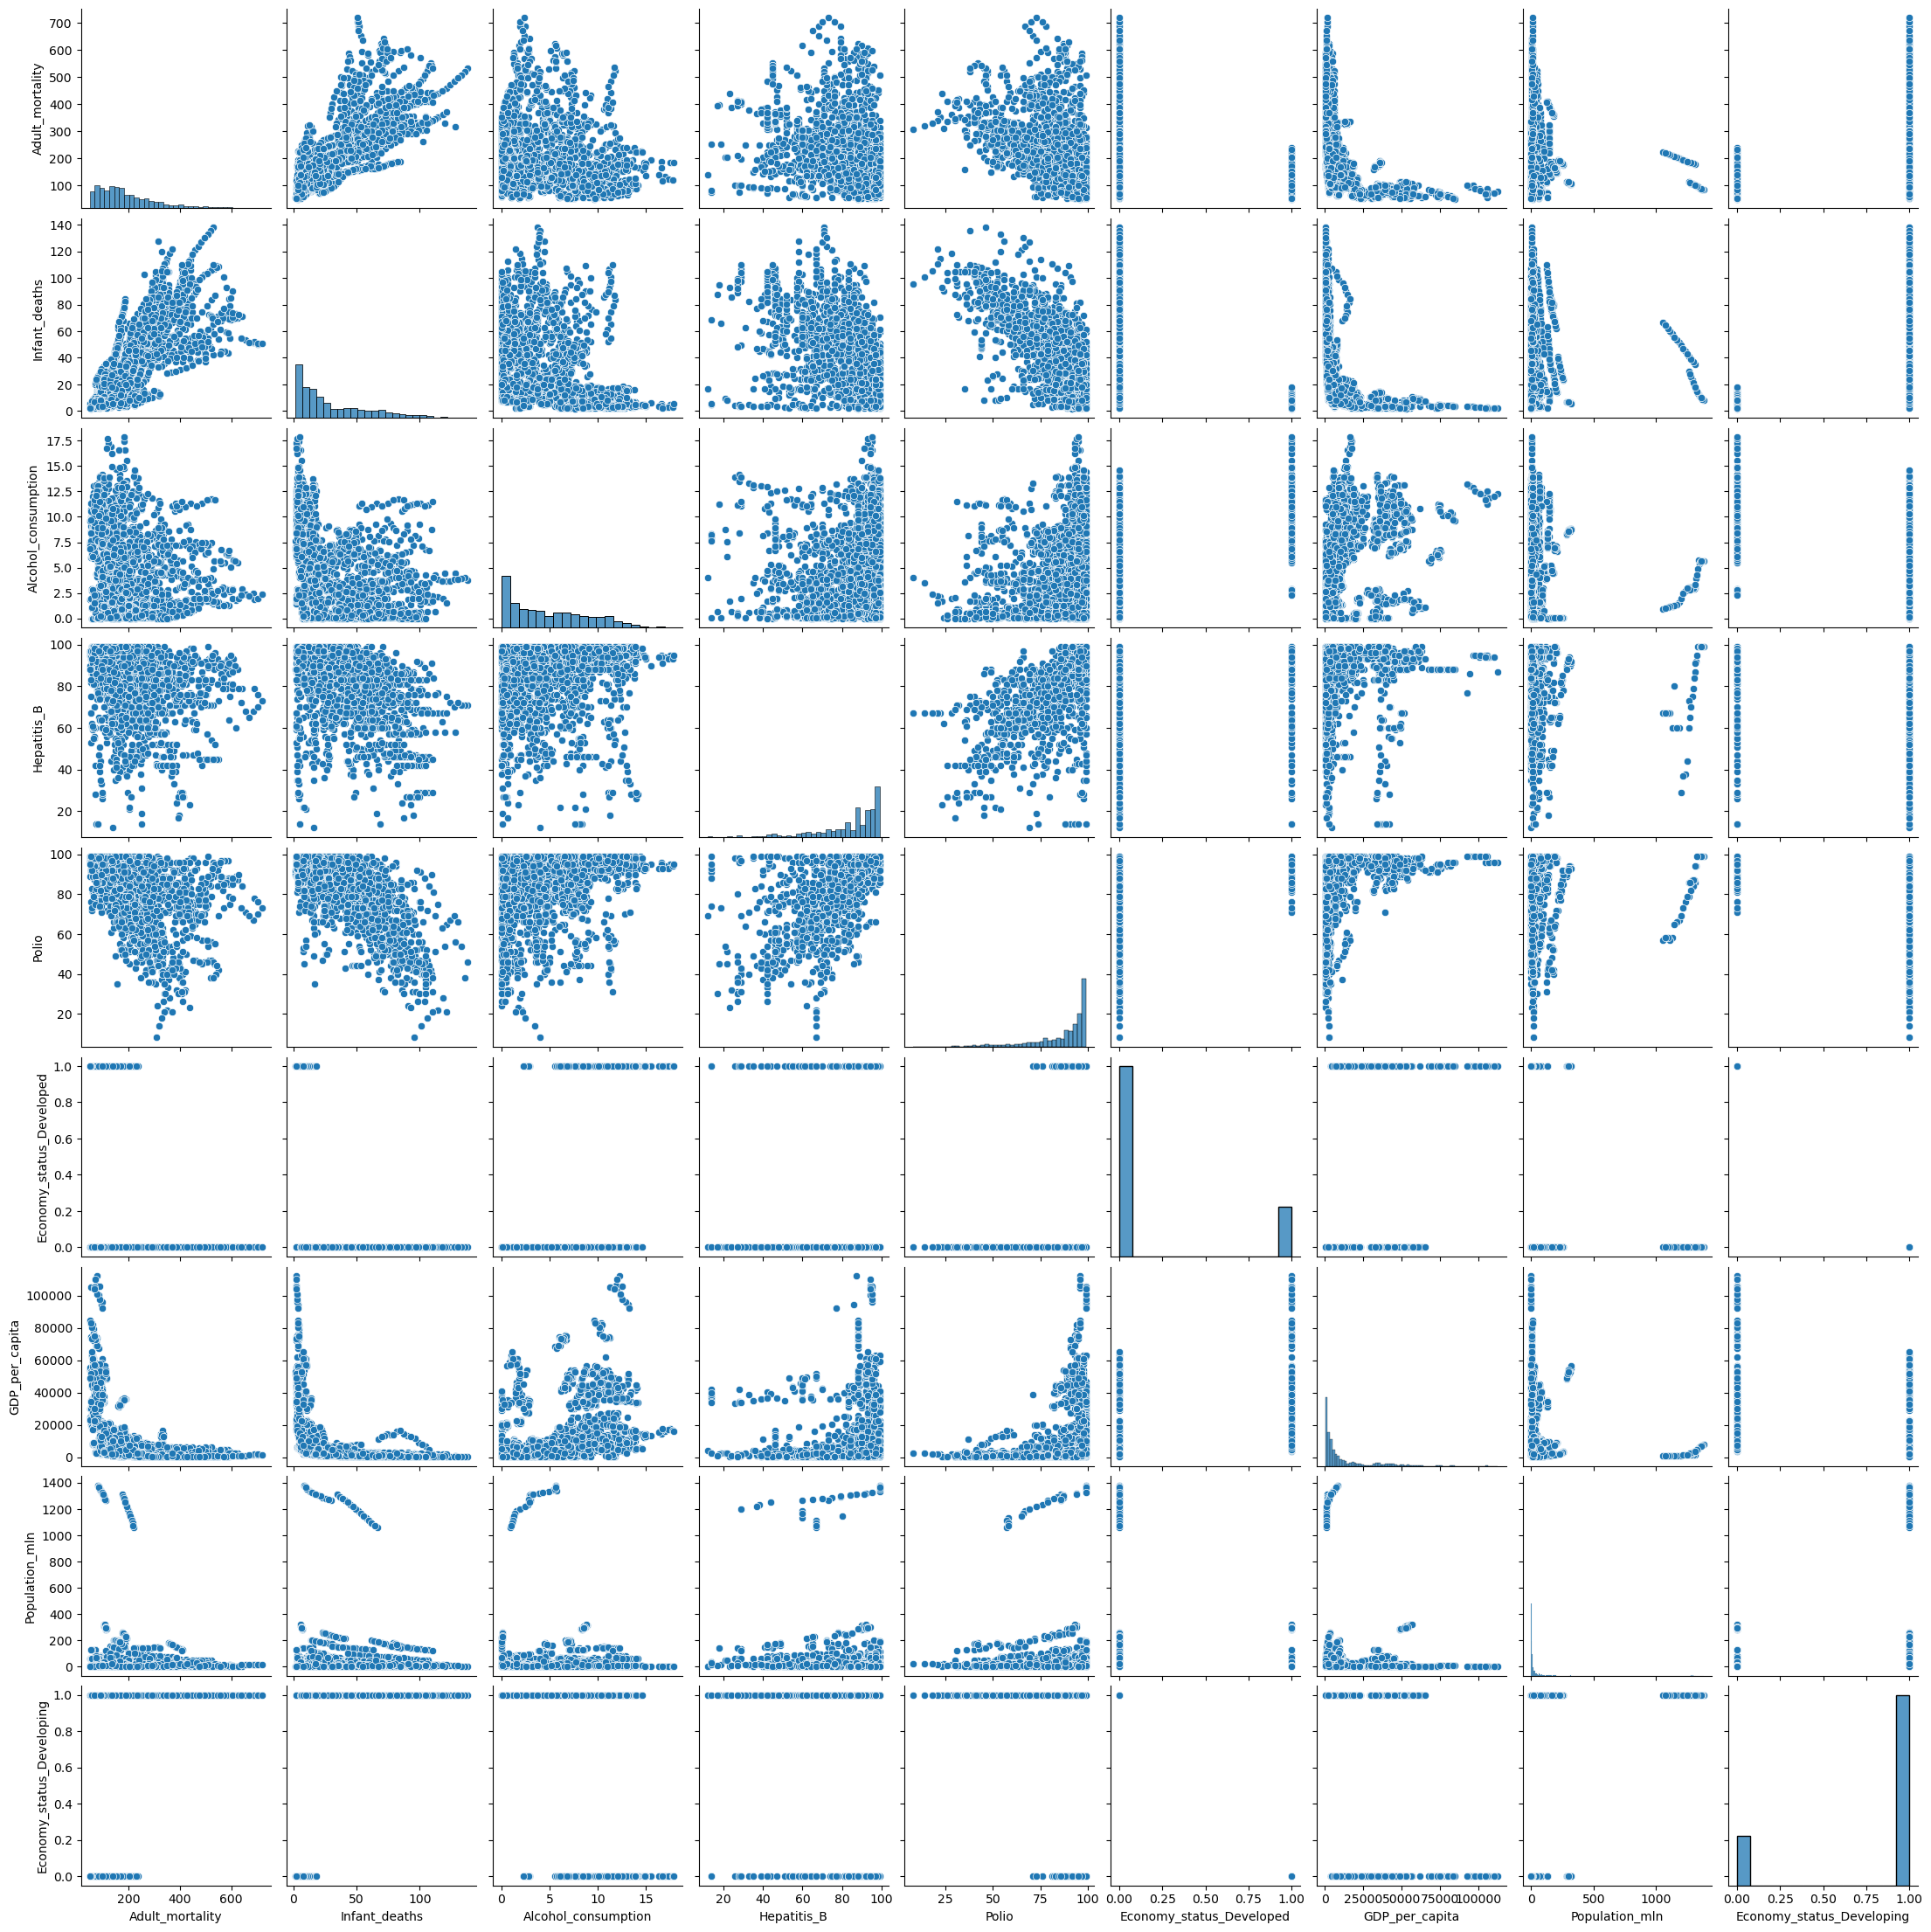

In [12]:
cont1 =["Adult_mortality","Infant_deaths","Alcohol_consumption","Hepatitis_B","Polio","Economy_status_Developed","GDP_per_capita","Population_mln","Economy_status_Developing"]
plt.figure(figsize= (10,12))
sn.pairplot(life[cont1])

In [13]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

<Figure size 1000x1200 with 0 Axes>

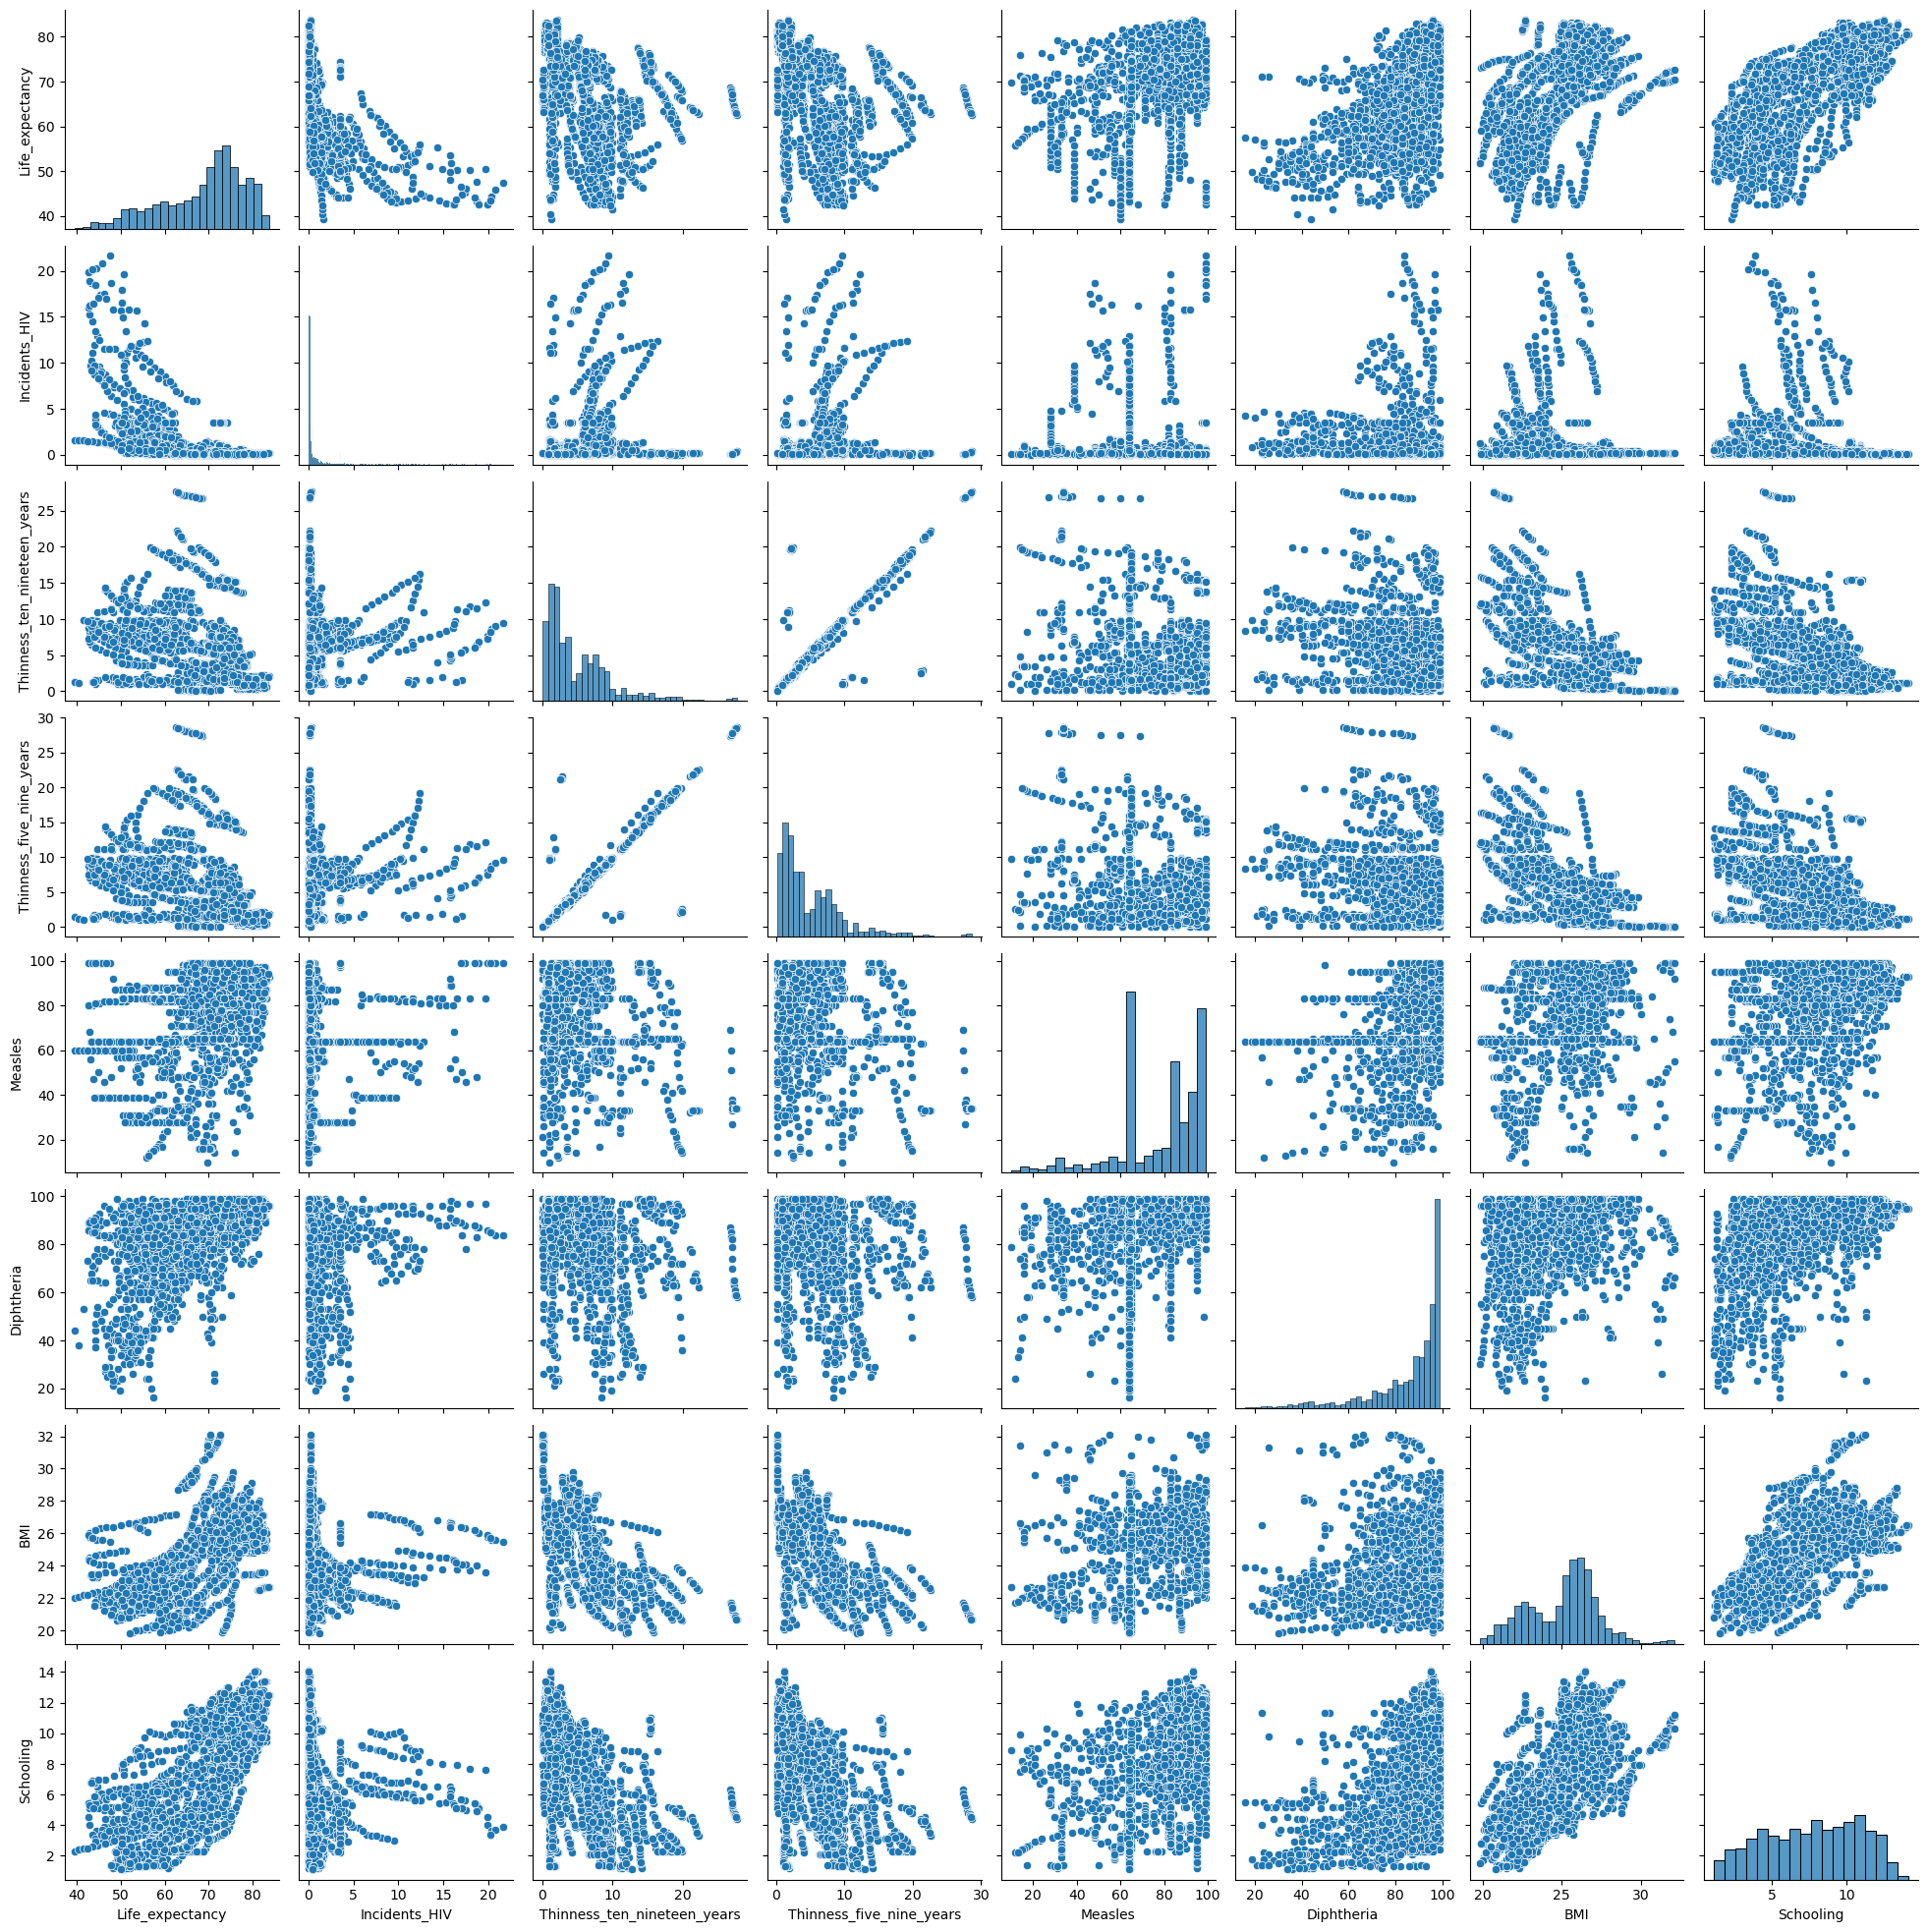

In [14]:
cont2 = ["Life_expectancy","Incidents_HIV", "Thinness_ten_nineteen_years" , "Thinness_five_nine_years","Measles", "Diphtheria", "BMI","Schooling"]

plt.figure(figsize= (10,12))
sn.pairplot(life[cont2])


C:\Users\candy\AppData\Local\Temp\ipykernel_6600\2892559654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(life.corr(), annot=True, cmap="winter", linewidths=2,linecolor="black",square=False)


Text(0.5, 1.0, 'CORRELATION BETWEEN PREDICTOR VARIABLES')

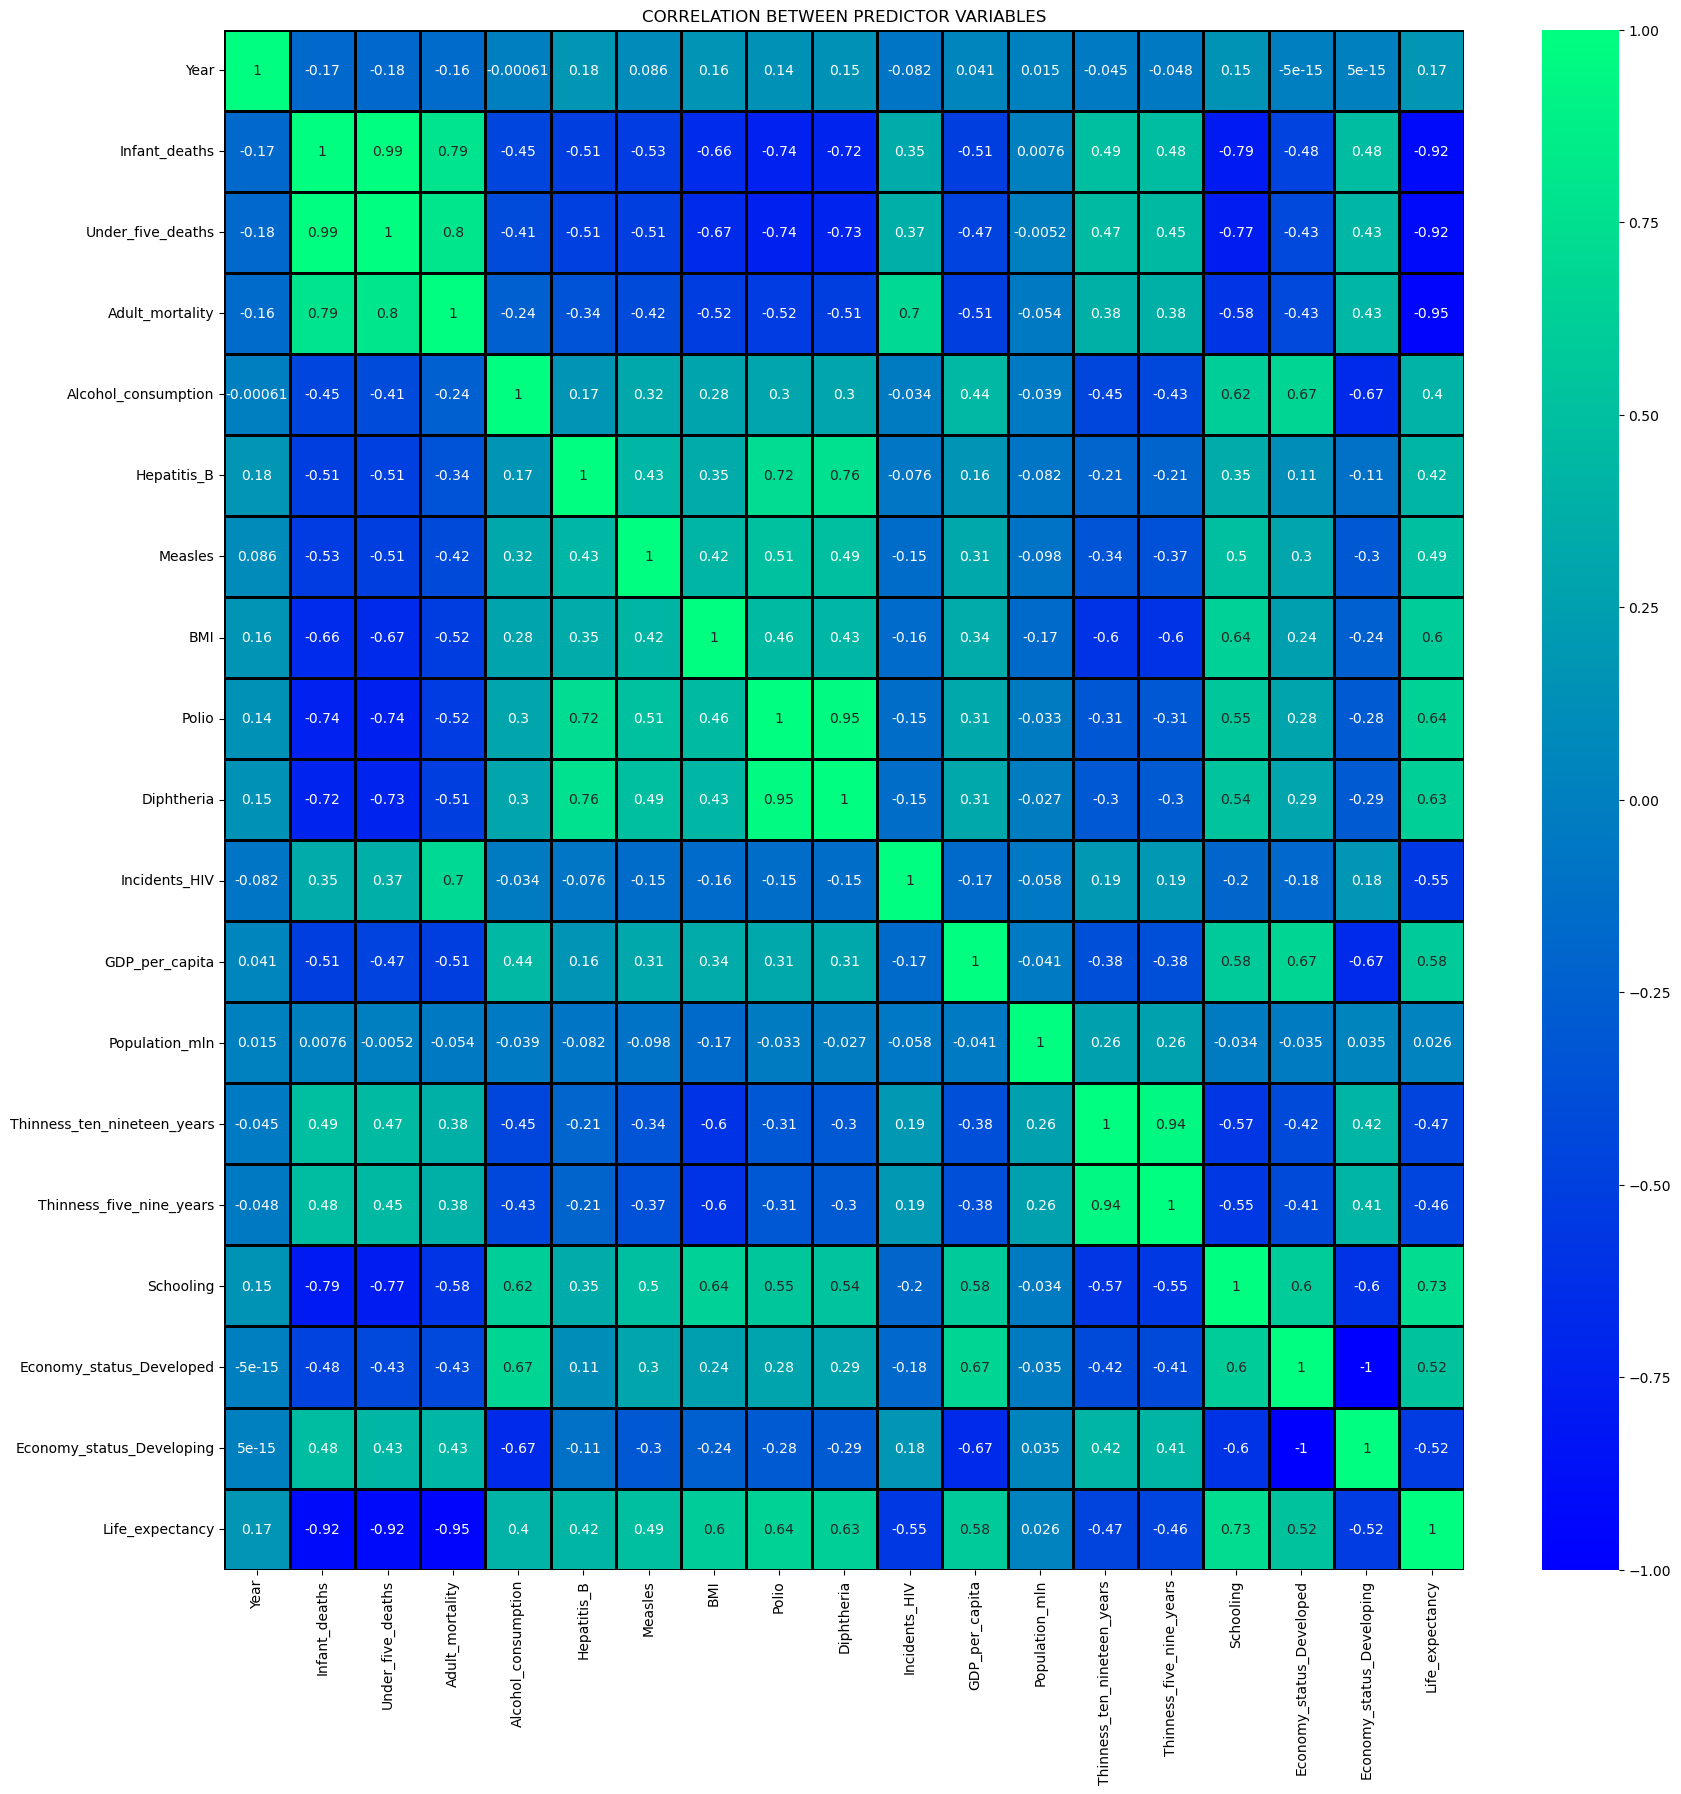

In [16]:
plt.figure(figsize=(20,20))
sn.heatmap(life.corr(), annot=True, cmap="winter", linewidths=2,linecolor="black",square=False)
plt.title("CORRELATION BETWEEN PREDICTOR VARIABLES")

BECAUSE WE HAVE MULTICOLINEARITY BETWEEN (THINNESS 1-19 YEARS AND THINNESS 5-9YEARS), ONE OF THE WAYS TO SOLVE MULTICOLINEARITY PROBLEM IS TO DROP ONE OF THE VARIABLES. IF ITS ABOVE O.8 OR LESS THAT-0.8 ALSO THERES MULTICOLINEARITY BETWEEN 



In [24]:
#FIRST MODEL 
x =life.iloc[:,3:20]
x
y = life.iloc[:, 20]
y
x
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_train, x_test, y_train, y_test
x
y


0       76.5
1       82.8
2       65.4
3       67.0
4       81.7
        ... 
2859    49.9
2860    66.9
2861    74.3
2862    71.8
2863    82.4
Name: Life_expectancy, Length: 2864, dtype: float64

In [25]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
print("b0 = ", reg.intercept_)
print("b1 = ", reg.coef_)
print("R2 = ", reg.score(x_train,y_train))

b0 =  84.49296393929232
b1 =  [-3.66601806e-02 -6.21439387e-02 -4.88886203e-02  7.18858534e-02
 -6.84396943e-03  5.50320139e-04 -1.32312636e-01 -5.47224842e-03
  8.83716508e-03  1.09247016e-01  2.60976231e-05 -9.84986700e-05
 -3.75612153e-02  6.30635492e-03  9.05657313e-02  2.77610832e-01
 -2.77610832e-01]
R2 =  0.9791874541728535


In [27]:
y_pred = reg.predict(x_test)
y_pred
f = pd.DataFrame(y_pred)
new_pred = pd.concat([f,y],axis='columns', sort=False)
new_pred.head(20)


,0,Life_expectancy
0,73.101253,76.5
1,72.721335,82.8
2,62.102429,65.4
3,73.447524,67.0
4,53.426901,81.7
5,70.946155,78.2
6,70.532575,71.2
7,72.853070,71.2
8,68.613123,71.9
9,73.326621,68.7


In [28]:
x_train = sm.add_constant(x_train)
model_1= sm.OLS(y_train,x_train)
ores = model_1.fit()
ores.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     5843.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:09:01   Log-Likelihood:                -3424.3
No. Observations:                2004   AIC:                             6883.
Df Residuals:                    1987   BIC:                             6978.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          56.3286      0.490    115.055      0.000      55.368      57.289
Infant_deaths                  -0.0367      0.007     -4.898      0.000      -0.051      -0.022
Under_five_deaths              -0.0621      0.005    -13.143      0.000      -0.071      -0.053
Adult_mortality                -0.0489      0.001    -64.783      0.000      -0.050      -0.047
Alcohol_consumption             0.0719      0.012      6.045      0.000       0.049       0.095
Hepatitis_B                    -0.0068      0.003     -2.321      0.020      -0.013      -0.001
Measles                         0.0006      0.002      0.270      0.787      -0.003       0.005
BMI                            -0.1323      0.023     -5.729      0.000      -0.178      -0.087
Polio                          -0.0055      0.007     -0.789      0.430      -0.019       0.008
Diphtheria                      0.0088      0.007      1.261      0.208      -0.005       0.023
Incidents_HIV                   0.1092      0.022      4.982      0.000       0.066       0.152
GDP_per_capita                2.61e-05   2.68e-06      9.734      0.000    2.08e-05    3.14e-05
Population_mln               -9.85e-05      0.000     -0.429      0.668      -0.001       0.000
Thinness_ten_nineteen_years    -0.0376      0.021     -1.819      0.069      -0.078       0.003
Thinness_five_nine_years        0.0063      0.020      0.309      0.757      -0.034       0.046
Schooling                       0.0906      0.020      4.543      0.000       0.051       0.130
Economy_status_Developed       28.4419      0.250    113.952      0.000      27.952      28.931
Economy_status_Developing      27.8867      0.256    108.856      0.000      27.384      28.389
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.277
Skew:                           0.029   Prob(JB):                        0.870
Kurtosis:                       2.997   Cond. No.                     5.20e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [32]:
#MODEL 2
x2 = life.loc[:, ["Adult_mortality","Under_five_deaths" ,"Infant_deaths", "BMI","Alcohol_consumption","Incidents_HIV","GDP_per_capita","Economy_status_Developing", "Economy_status_Developed","Schooling"]]
x2
y2 =y = life.iloc[:, 20]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3)
x2_train, x2_test, y2_train, y2_test
x2
y2

0       76.5
1       82.8
2       65.4
3       67.0
4       81.7
        ... 
2859    49.9
2860    66.9
2861    74.3
2862    71.8
2863    82.4
Name: Life_expectancy, Length: 2864, dtype: float64

In [33]:
reg2=LinearRegression()
reg2.fit(x2_train,y2_train)

LinearRegression()

In [34]:
print("b0 = ", reg2.intercept_)
print("b1 = ", reg2.coef_)
print("R2 = ", reg2.score(x2_train,y2_train))

b0 =  83.30878597179928
b1 =  [-4.78927095e-02 -4.94434324e-02 -5.75978767e-02 -1.06545640e-01
  6.74380095e-02  7.75952496e-02  2.69345350e-05 -3.41554911e-01
  3.41554911e-01  1.02351796e-01]
R2 =  0.9787332009144014


In [35]:
y2_pred = reg2.predict(x2_test)
y2_pred
f2 = pd.DataFrame(y2_pred)
new_pred2 = pd.concat([f2,y2],axis='columns', sort=False)
new_pred2.head(20)

,0,Life_expectancy
0,71.916782,76.5
1,75.028801,82.8
2,79.764495,65.4
3,79.885245,67.0
4,77.714054,81.7
5,72.620855,78.2
6,79.034063,71.2
7,68.062115,71.2
8,40.992818,71.9
9,58.783975,68.7


In [ ]:
# x_train = sm.add_constant(x_train)
# model_1= sm.OLS(y_train,x_train)
# ores = model_1.fit()
# ores.summary()